In [3]:
cd ..

/home/scott/Documents/git/bite-me


In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
import datetime

In [4]:
# Import from this project
from eat_it.utils import uniquehist

In [28]:
from eat_it import boxcoxscaler

In [5]:
from scipy.stats import boxcox

In [6]:
from scipy import stats

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [8]:
def uniquehist(x, bins=None):
    if bins is not None:
        ux = bins
    else:
        ux = np.unique(x)
    count = np.zeros(len(ux),dtype=int)
    for ix,xx in enumerate(ux):
        count[ix] = np.sum(x==xx)
    return ux, count

In [10]:
train = pd.read_csv('data/train.csv', encoding="utf-8")

In [11]:
for col in cols:
    plt.bar(uhistdict[col][0],uhistdict[col][1])
    plt.title(col)
    plt.show()

NameError: name 'cols' is not defined

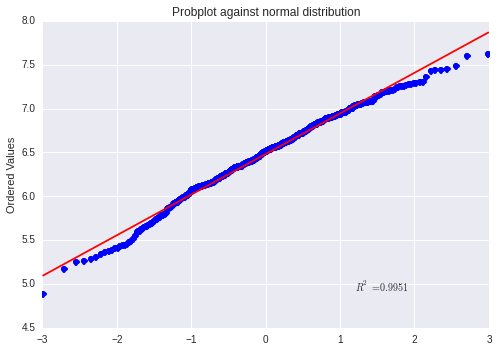

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = stats.loggamma.rvs(5, size=500) + 5
stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

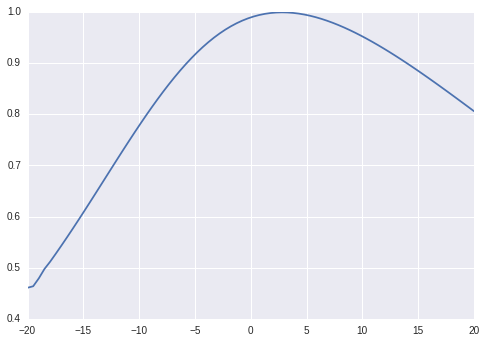

In [13]:
a,b = stats.boxcox_normplot(x, -20, 20)
plt.plot(a,b)

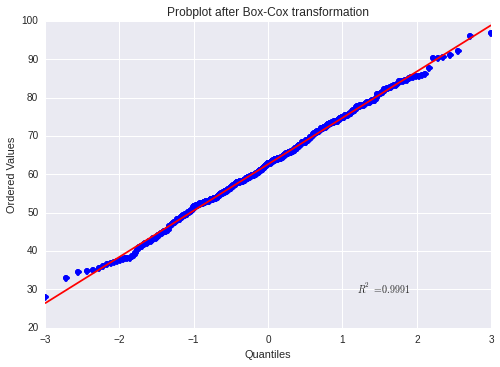

In [14]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
xt, _ = stats.boxcox(x)
stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

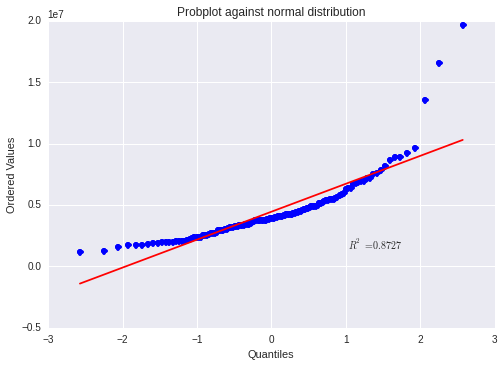

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(train['revenue'].values, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

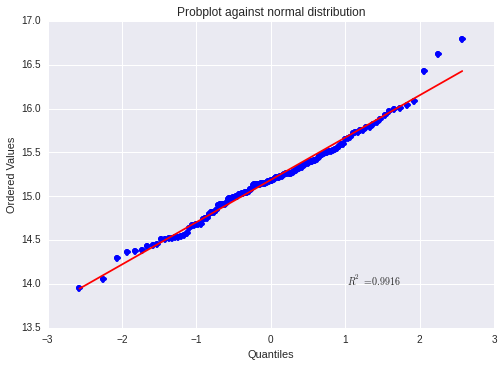

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(np.log(train['revenue'].values), dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

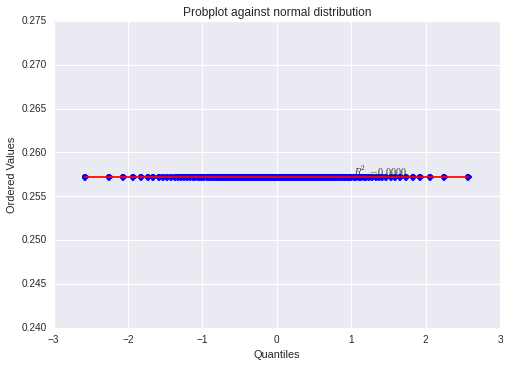

In [17]:
y_box, lambda_ = stats.boxcox(train['revenue'].values)

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_box, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

In [18]:
train['revenue'].values

array([  5653753.,   6923131.,   2055379.,   2675511.,   4316715.,
         5017319.,   5166635.,   4491607.,   4952497.,   5444227.,
         3745135.,   5161370.,   1734634.,   4807746.,   1999097.,
         3218918.,  19696939.,   8213524.,   5337526.,   2021934.,
         5525735.,   1149870.,   3956086.,   2999068.,   8904084.,
         3778621.,   2267425.,   5435276.,   4705945.,   3447890.,
         3008199.,   2058644.,   3261924.,   2371202.,   4100886.,
         3903884.,   3028267.,   2740687.,   5461700.,   3818055.,
         6836483.,   4554237.,   4952255.,   2732645.,   4264176.,
         3752885.,   4250758.,   7865428.,   7201784.,   8630682.,
         2156098.,   3273041.,   1763231.,   5595267.,   4651866.,
         6941173.,   2390534.,   3258837.,   3004429.,   3600467.,
         3164972.,   4350573.,   5286212.,   1619683.,   2551252.,
         1756069.,   1882131.,   4052733.,   3836721.,   3452382.,
         3982767.,   4136425.,   2525375.,   3347767.,   55008

In [19]:
lambda_

-3.8877763740620854

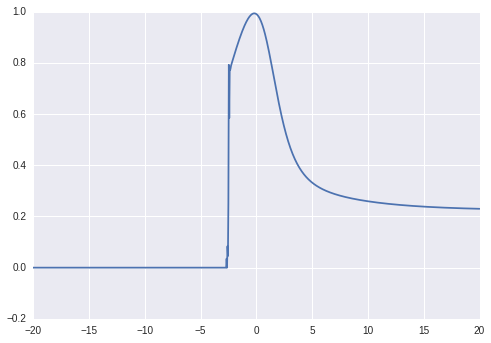

In [20]:
a,b = stats.boxcox_normplot(train['revenue'].values, -20, 20, None, 1000)
plt.plot(a,b)

In [21]:
a[np.argmax(b)]

-0.18018018018018012

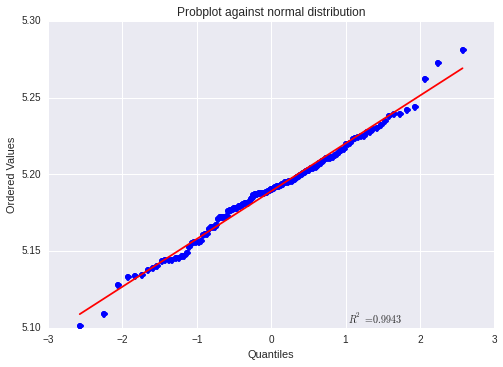

In [22]:
y_box = stats.boxcox(train['revenue'].values, -0.18018018018018012)

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_box, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

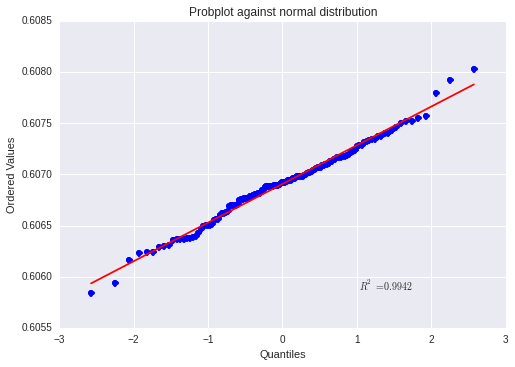

In [23]:
y_box, lambda_ = stats.boxcox(np.log(train['revenue'].values))

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_box, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

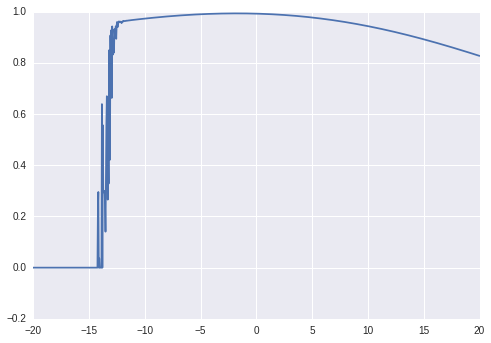

In [24]:
a,b = stats.boxcox_normplot(np.log(train['revenue'].values), -20, 20, None, 1000)
plt.plot(a,b)

In [25]:
a[np.argmax(b)]

-1.7417417417417411

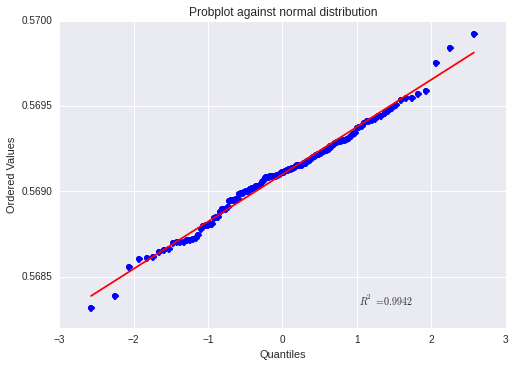

In [69]:
y_box = stats.boxcox(np.log(train['revenue'].values), a[np.argmax(b)])

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_box, dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

In [70]:
y_box

array([ 0.56931362,  0.56942116,  0.56871369,  0.5688809 ,  0.56916425,
        0.56924839,  0.56926454,  0.56918669,  0.56924121,  0.56929314,
        0.56908267,  0.56926398,  0.56860163,  0.56922475,  0.5686956 ,
        0.56899337,  0.56992072,  0.569509  ,  0.56928236,  0.56870301,
        0.56930122,  0.56831443,  0.56911439,  0.56895079,  0.5695496 ,
        0.56908785,  0.56877692,  0.56929225,  0.56921283,  0.56903421,
        0.56895263,  0.56871472,  0.5690013 ,  0.56880535,  0.56913503,
        0.56910673,  0.56895666,  0.56889576,  0.56929489,  0.56909387,
        0.56941459,  0.56919448,  0.56924118,  0.56889395,  0.5691573 ,
        0.56908388,  0.56915551,  0.56948699,  0.56944168,  0.56953398,
        0.56874464,  0.56900333,  0.56861259,  0.569308  ,  0.56920637,
        0.56942252,  0.56881049,  0.56900073,  0.56895187,  0.56905968,
        0.56898325,  0.56916868,  0.56927708,  0.5685553 ,  0.56885135,
        0.56860986,  0.56865598,  0.56912827,  0.5690967 ,  0.56

In [64]:
import pdb

In [30]:
import imp

In [80]:
imp.reload(boxcoxscaler)

<module 'eat_it.boxcoxscaler' from '/home/scott/Documents/git/bite-me/eat_it/boxcoxscaler.py'>

(137, 1)


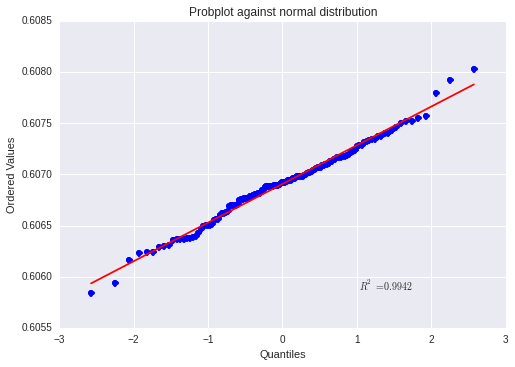

In [73]:
scaler = boxcoxscaler.BoxCoxScaler(standardise=False)

y_in = np.log(train['revenue'].values)
y_in = np.expand_dims(y_in, 1)
print(y_in.shape)

y_box = scaler.fit_transform(y_in)

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(np.squeeze(y_box), dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

In [68]:
y_box

array([[ 0.60719662],
       [ 0.60734366],
       [ 0.60638014],
       [ 0.60660708],
       [ 0.60699274],
       [ 0.60710754],
       [ 0.60712958],
       [ 0.60702334],
       [ 0.60709773],
       [ 0.60716864],
       [ 0.60688157],
       [ 0.60712881],
       [ 0.6062283 ],
       [ 0.60707527],
       [ 0.60635561],
       [ 0.60676   ],
       [ 0.60802965],
       [ 0.60746392],
       [ 0.60715391],
       [ 0.60636566],
       [ 0.60717967],
       [ 0.60584008],
       [ 0.60692478],
       [ 0.60670208],
       [ 0.60751955],
       [ 0.60688861],
       [ 0.6064659 ],
       [ 0.60716742],
       [ 0.607059  ],
       [ 0.60681557],
       [ 0.60670458],
       [ 0.60638154],
       [ 0.60677078],
       [ 0.60650449],
       [ 0.60695291],
       [ 0.60691434],
       [ 0.60671006],
       [ 0.60662727],
       [ 0.60717102],
       [ 0.60689682],
       [ 0.60733466],
       [ 0.60703396],
       [ 0.60709769],
       [ 0.60662481],
       [ 0.60698326],
       [ 0

(137, 1)


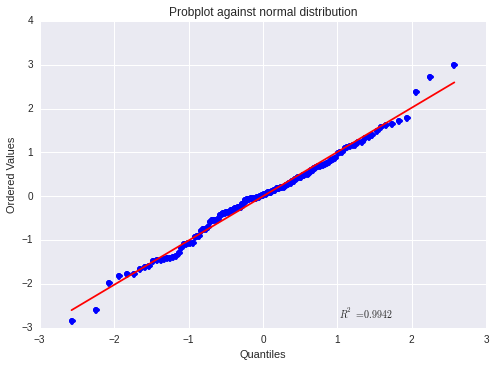

In [74]:
scaler = boxcoxscaler.BoxCoxScaler(standardise=True)

y_in = np.log(train['revenue'].values)
y_in = np.expand_dims(y_in, 1)
print(y_in.shape)

y_box = scaler.fit_transform(y_in)

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(np.squeeze(y_box), dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

In [75]:
print(y_box)

[[ 0.77501775]
 [ 1.16780643]
 [-1.40605015]
 [-0.79981012]
 [ 0.23039875]
 [ 0.53705764]
 [ 0.59593916]
 [ 0.31214629]
 [ 0.51085385]
 [ 0.70029125]
 [-0.06658081]
 [ 0.59389698]
 [-1.81166128]
 [ 0.45086148]
 [-1.47157415]
 [-0.39133469]
 [ 3.00031543]
 [ 1.48906916]
 [ 0.66093274]
 [-1.4447276 ]
 [ 0.729754  ]
 [-2.84873441]
 [ 0.04885786]
 [-0.54604396]
 [ 1.63768287]
 [-0.04775393]
 [-1.17695311]
 [ 0.69702432]
 [ 0.40738881]
 [-0.24288401]
 [-0.53935615]
 [-1.4023142 ]
 [-0.36252384]
 [-1.0738658 ]
 [ 0.12399468]
 [ 0.02097548]
 [-0.5247413 ]
 [-0.74588197]
 [ 0.70665047]
 [-0.02583236]
 [ 1.14376928]
 [ 0.34051788]
 [ 0.51075527]
 [-0.75245401]
 [ 0.20508045]
 [-0.06220599]
 [ 0.19855572]
 [ 1.40852874]
 [ 1.24279154]
 [ 1.58050498]
 [-1.29391762]
 [-0.35514884]
 [-1.77202212]
 [ 0.75448893]
 [ 0.38384484]
 [ 1.17276734]
 [-1.05525022]
 [-0.36457699]
 [-0.54211451]
 [-0.15025109]
 [-0.42812095]
 [ 0.24652416]
 [ 0.64167559]
 [-1.97917718]
 [-0.90704657]
 [-1.78187784]
 [-1.61500

In [77]:
print(np.exp(scaler.inverse_transform(y_box)))

[[  5653753.00000024]
 [  6923131.0000001 ]
 [  2055379.00000005]
 [  2675511.00000011]
 [  4316715.00000008]
 [  5017318.99999985]
 [  5166635.0000005 ]
 [  4491606.99999981]
 [  4952496.99999981]
 [  5444227.0000005 ]
 [  3745135.00000014]
 [  5161369.99999947]
 [  1734634.00000014]
 [  4807745.99999976]
 [  1999097.00000011]
 [  3218918.00000001]
 [ 19696939.00000098]
 [  8213524.00000044]
 [  5337525.99999986]
 [  2021933.99999994]
 [  5525734.99999988]
 [  1149870.00000002]
 [  3956085.99999978]
 [  2999067.99999986]
 [  8904084.00000028]
 [  3778620.99999984]
 [  2267425.00000006]
 [  5435275.99999986]
 [  4705944.9999998 ]
 [  3447890.0000001 ]
 [  3008198.99999991]
 [  2058643.99999998]
 [  3261923.99999994]
 [  2371202.00000017]
 [  4100886.00000024]
 [  3903883.99999999]
 [  3028266.99999993]
 [  2740686.99999994]
 [  5461699.99999986]
 [  3818054.99999992]
 [  6836482.99999973]
 [  4554236.99999981]
 [  4952254.99999987]
 [  2732645.00000021]
 [  4264175.99999985]
 [  375288

In [78]:
print(train['revenue'].values)

[  5653753.   6923131.   2055379.   2675511.   4316715.   5017319.
   5166635.   4491607.   4952497.   5444227.   3745135.   5161370.
   1734634.   4807746.   1999097.   3218918.  19696939.   8213524.
   5337526.   2021934.   5525735.   1149870.   3956086.   2999068.
   8904084.   3778621.   2267425.   5435276.   4705945.   3447890.
   3008199.   2058644.   3261924.   2371202.   4100886.   3903884.
   3028267.   2740687.   5461700.   3818055.   6836483.   4554237.
   4952255.   2732645.   4264176.   3752885.   4250758.   7865428.
   7201784.   8630682.   2156098.   3273041.   1763231.   5595267.
   4651866.   6941173.   2390534.   3258837.   3004429.   3600467.
   3164972.   4350573.   5286212.   1619683.   2551252.   1756069.
   1882131.   4052733.   3836721.   3452382.   3982767.   4136425.
   2525375.   3347767.   5500818.  16549064.   4590423.   1904842.
   3871344.   6313221.   3727364.   4066618.   3807496.   5966193.
   4250553.   7495092.   3351383.   5906596.   2025297.   2364

In [84]:
imp.reload(boxcoxscaler)

<module 'eat_it.boxcoxscaler' from '/home/scott/Documents/git/bite-me/eat_it/boxcoxscaler.py'>

In [85]:
scaler = boxcoxscaler.BoxCoxScaler(standardise=True)

y_in = train['revenue'].values
y_in = np.expand_dims(y_in, 1)
print(y_in.shape)

y_box = scaler.fit_transform(y_in)

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(np.squeeze(y_box), dist=stats.norm, plot=ax1)
ax1.set_title('Probplot against normal distribution')

(137, 1)


ValueError: Lambda was badly chosen for feature 0. Values became singular!